# Análise exploratória de dados

**Importando Bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from scipy.stats import linregress

Definição da Paleta de Cores

In [2]:
qualitative_colors = sns.color_palette("husl", 8)
palet_colors = sns.color_palette("Purples", 8)
palet_colors2 = sns.color_palette("Purples_d", 8)

## 1. Leitura do conjunto de dados

In [3]:
df= pd.read_csv("../data/raw/wines_SPA.csv")
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


## 2. Descrição dos dados

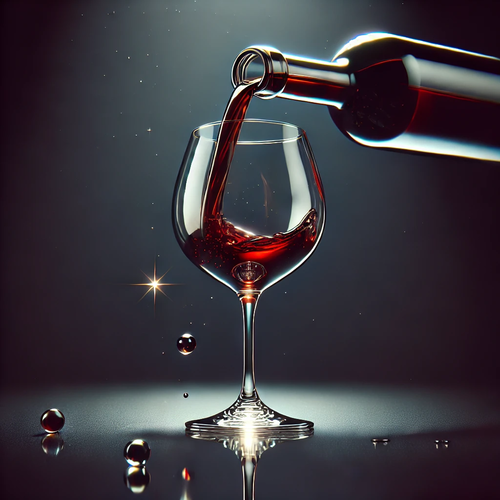

O conjunto de dados de vinhos apresenta informações detalhadas sobre vinícolas, tipos de vinhos e suas características, incluindo o ano de produção e avaliações de qualidade. A variável vinícola identifica o produtor do vinho, enquanto vinho se refere ao nome específico do produto. A variável ano indica o ano de produção, e avaliação representa a média de avaliações recebidas pelo vinho, refletindo sua qualidade em uma escala definida.

A popularidade de cada vinho pode ser observada pela variável num_avaliações, que indica o número de avaliações recebidas. A variável região especifica a região de origem, permitindo identificar características típicas de cada local. O preço reflete o valor médio do vinho, enquanto tipo informa a variedade (como tinto ou branco). As variáveis corpo e acidez fornecem detalhes adicionais sobre as propriedades sensoriais, indicando a intensidade e o nível de acidez em uma escala qualitativa.

Esse conjunto de dados, com variáveis quantitativas e qualitativas, oferece uma base robusta para análises que exploram os fatores que influenciam as avaliações e a preferência dos consumidores, além de permitir comparações entre regiões, anos de produção e tipos de vinho.

#### 2.1 **Dicionário**

In [4]:
data_path = Path('../data/external/dictionary.csv')
# data_path = Path('dictionary.csv')
df_dictionary = pd.read_csv(data_path, sep=',') 
df_dictionary

,variavel,descricao,tipo,subtipo
0,winery,Nome da vinícola,qualitativa,nominal
1,wine,Nome do vinho,qualitativa,nominal
2,year,Ano em que as uvas foram colhidas,quantitativa,discreta
3,rating,Avaliação média dada ao vinho pelos usuários [...,quantitativa,contínua
4,num_reviews,Número de usuários que avaliaram o vinho,quantitativa,discreta
5,country,País de origem [Espanha],qualitativa,nominal
6,region,Região do vinho,qualitativa,nominal
7,price,Preço em euros [€],quantitativa,contínua
8,type,Variedade de vinho,qualitativa,nominal
9,body,"Pontuação de corpo, definida como a riqueza e ...",qualitativa,ordinal


### 2.2 Análise e Modificações de Colunas e Variáveis

**Transformação dos nomes de colunas para pt-BR**

In [5]:
# Renomeando as colunas
df.rename(columns={
    'winery': 'vinícola',
    'wine': 'vinho',
    'year': 'ano',
    'rating': 'avaliação',
    'num_reviews': 'num_avaliações',
    'country': 'país',
    'region': 'região',
    'price': 'preço',
    'type': 'tipo',
    'body': 'corpo',
    'acidity': 'acidez'
    
}, inplace=True)


df.head(5)

,vinícola,vinho,ano,avaliação,num_avaliações,país,região,preço,tipo,corpo,acidez
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


**Verificando os valores da coluna país**

In [6]:
print(df.duplicated().sum())

5452


In [7]:
df = df.drop(df[df.duplicated()].index, axis=0)
df.reset_index()
print(f'Number of Duplicates: {df.duplicated().sum()}')

Number of Duplicates: 0


In [8]:
df["país"].value_counts() 

Espana    2048
Name: país, dtype: int64

* Observa-se que todas as linhas dessa coluna possuem o mesmo valor então ela será descartada

In [9]:
df = df.drop(columns=['país'])
df.head(5)

,vinícola,vinho,ano,avaliação,num_avaliações,região,preço,tipo,corpo,acidez
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


**Informações sobre o dataset**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 6100
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   vinícola        2048 non-null   object 
 1   vinho           2048 non-null   object 
 2   ano             2046 non-null   object 
 3   avaliação       2048 non-null   float64
 4   num_avaliações  2048 non-null   int64  
 5   região          2048 non-null   object 
 6   preço           2048 non-null   float64
 7   tipo            1942 non-null   object 
 8   corpo           1777 non-null   float64
 9   acidez          1777 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 176.0+ KB


* Ao todo são 10 colunas e 7500 linhas. É possível observar a presença de nulos em ano, tipo, corpo e acidez pois essas colunas possuem números de linhas inferiores a 7500

**Contagem de valores nulos por coluna**

In [11]:
print(df.isnull().sum()) 

vinícola            0
vinho               0
ano                 2
avaliação           0
num_avaliações      0
região              0
preço               0
tipo              106
corpo             271
acidez            271
dtype: int64


**Verificando valores únicos em Ano**

In [12]:
df['ano'].unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

* Observamos o valor N.V. (Non Vintage), que indica um vinho sem safra, produzido a partir de uvas colhidas em diferentes anos. Assim, vamos identificar quantos registros contêm esse valor e substituí-lo por NaN, permitindo uma análise mais precisa na coluna referente ao ano.

In [13]:
df['ano'] = df['ano'].replace('N.V.', np.nan)
#df['ano'] = df['ano'].fillna(np.nan).astype('Int64')
#df['ano'] = pd.to_datetime(df['ano'], format='%Y')

df['ano'] = pd.to_datetime(df['ano'], format= '%Y')
df['ano'] = df['ano'].dt.year

print(f"Quantidade de vinhos sem safra (ano): {df['ano'].isnull().sum()}")

Quantidade de vinhos sem safra (ano): 72


**Verificando Duplicatas**

In [14]:
duplicatas = df.duplicated().value_counts()
duplicatas

False    2048
dtype: int64

**Convertendo o tipo de preço para float e padronizando as casas decimais**

In [15]:
df['preço'] = df['preço'].astype(float)# Convertendo para float
df['preço'] = df['preço'].round(2)# Padronizando com duas casas decimais

**Convertendo os tipos de corpo e acidez para inteiro**

* Seria interessante tentar tratar os NAN para não precisar converter eles para valor 0

In [16]:
df['corpo'] = df['corpo'].fillna(0).astype(int)
df['acidez'] = df['acidez'].fillna(0).astype(int)

In [17]:
df.head()

,vinícola,vinho,ano,avaliação,num_avaliações,região,preço,tipo,corpo,acidez
0,Teso La Monja,Tinto,2013.0,4.9,58,Toro,995.00,Toro Red,5,3
1,Artadi,Vina El Pison,2018.0,4.9,31,Vino de Espana,313.50,Tempranillo,4,2
2,Vega Sicilia,Unico,2009.0,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5,3
3,Vega Sicilia,Unico,1999.0,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5,3
4,Vega Sicilia,Unico,1996.0,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5,3


## 3. Perguntas de partida e hipóteses

1. Top 3 vinhos mais baratos e mais caros e suas respectivas vinícolas
2. O tipo de vinho afeta a avaliação média ou o preço?
3. Há alguma relação entre a avaliação (rating) e o preço (price) médio dos vinhos?
4. Quais são os melhores anos de vinhos avaliados? São os mais antigos?
5. A acidez ou o corpo dos vinhos influenciam a avaliação média dos usuários?
6. Correlação entre as variáveis. Quais as maiores e menores?
7. Qual região teve o maior número de avaliações em relação ao ano?

In [18]:
print("Tabela de características das variáveis qualitativas:\n")
df.describe(include=['object'])

Tabela de características das variáveis qualitativas:



,vinícola,vinho,região,tipo
count,2048,2048,2048,1942
unique,480,847,76,21
top,Vega Sicilia,Tinto,Ribera del Duero,Ribera Del Duero Red
freq,97,56,541,535


In [19]:
df.describe().round(2)

,ano,avaliação,num_avaliações,preço,corpo,acidez
count,1976.00,2048.00,2048.00,2048.00,2048.00,2048.00
mean,2011.15,4.40,573.99,135.24,3.70,2.53
std,11.19,0.15,1376.15,272.18,1.57,1.04
min,1910.00,4.20,25.00,4.99,0.00,0.00
25%,2010.00,4.30,58.00,31.92,4.00,3.00
50%,2015.00,4.40,141.00,53.62,4.00,3.00
75%,2017.00,4.50,485.50,110.00,5.00,3.00
max,2021.00,4.90,32624.00,3119.08,5.00,3.00


A média das avaliações dos vinhos é de 4,40, com uma baixa dispersão (desvio padrão de 0,15), o que indica uma tendência positiva e consistente nas notas. O número de avaliações por vinho varia amplamente, com uma média de 573,99 avaliações e um desvio padrão de 1376,15, sugerindo que alguns vinhos são muito populares, enquanto outros recebem poucas avaliações. O preço médio dos vinhos é de 135,24, com uma ampla faixa de valores (de 4,99 a 3119,08), refletindo a diversidade de preços dos produtos analisados.

Em relação às características sensoriais, o corpo tem uma média de 3,70 e a acidez de 2,53. A maioria dos vinhos apresenta corpo entre 4 e 5, enquanto a acidez se concentra entre 2 e 3, indicando uma distribuição que favorece vinhos de corpo mais elevado e acidez moderada.

Os quartis mostram que a maioria dos vinhos tem preços acessíveis (25% abaixo de 31,92) e características sensoriais moderadas, enquanto os valores extremos destacam vinhos de alta gama ou com perfis sensoriais diferenciados. Esses dados fornecem uma visão abrangente sobre os padrões de qualidade e preço dos vinhos analisados.

#### 1. Top 3 vinhos mais baratos e mais caros e suas respectivas vinícolas

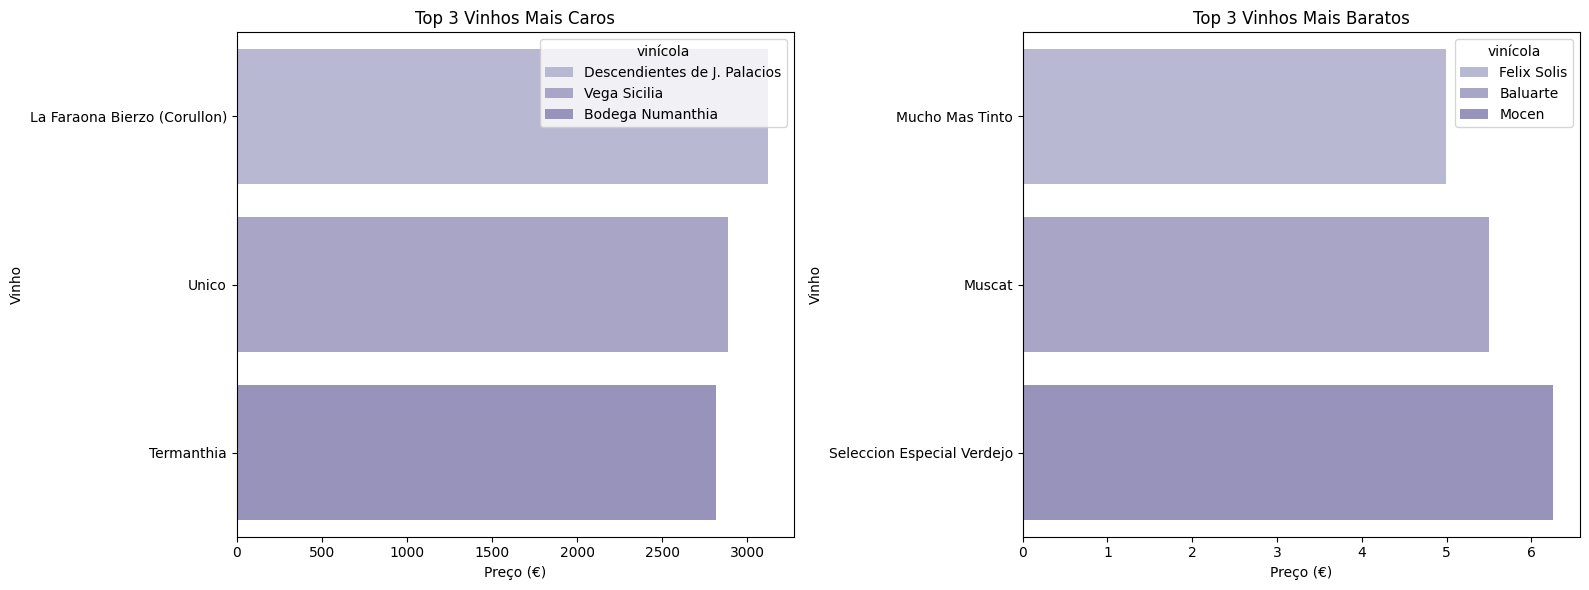

In [20]:
top_3_caros = df.nlargest(3, 'preço')[['vinho', 'preço', 'vinícola']]
top_3_baratos = df.nsmallest(3, 'preço')[['vinho', 'preço', 'vinícola']]

plt.figure(figsize=(16, 6))

# Gráfico dos vinhos mais caros
plt.subplot(1, 2, 1)
sns.barplot(x='preço', y='vinho', data=top_3_caros, hue='vinícola', palette=palet_colors2, dodge=False)
plt.title('Top 3 Vinhos Mais Caros')
plt.xlabel('Preço (€)')
plt.ylabel('Vinho')

# Gráfico dos vinhos mais baratos
plt.subplot(1, 2, 2)
sns.barplot(x='preço', y='vinho', data=top_3_baratos, hue='vinícola', palette=palet_colors2, dodge=False)
plt.title('Top 3 Vinhos Mais Baratos')
plt.xlabel('Preço (€)')
plt.ylabel('Vinho')

plt.tight_layout()
plt.show()

Os gráficos mostram os top 3 vinhos mais caros e vinhos mais baratos. É interessante perceber a discrepancia dos valores. Duas das vinícolas com vinhos mais caros ficam localizadas no Noroeste da espanha, uma região montanhosa, apenas Mocén – Vinícolas localizada na mesma região, possui um preço menor. No Centro-Norte temos Felix Solis e Baluarte que são vinícolas presentes nas regiões mais ao sul e centro, com menor altitude em comparação ao grupo anterior.

#### 2. **O tipo de vinho afeta a avaliação média?**

In [21]:
df['tipo'].unique()

array(['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Pedro Ximenez',
       'Red', 'Sherry', 'Priorat Red', 'Rioja Red', 'Rioja White',
       'Grenache', nan, 'Cava', 'Verdejo', 'Syrah', 'Monastrell',
       'Mencia', 'Sparkling', 'Montsant Red', 'Albarino', 'Chardonnay',
       'Cabernet Sauvignon', 'Sauvignon Blanc'], dtype=object)

Separação dos vinhos quanto ao tipo: 

**Vinhos Tintos:** Toro Red, Tempranillo,Ribera Del Duero Red, Red, Sherry,Priorat Red,Rioja Red,Grenache,Syrah,Monastrell,Mencia,Montsant Red,Cabernet Sauvignon.<br>

**Vinhos Brancos:** Rioja White, Verdejo, Albarino, Chardonnay, Sauvignon Blanc.<br>

**Vinhos Espumantes:** Cava, Sparkling.<br>

**Vinho Indefinido (nan):** Sem classificação

In [22]:
df["tipo"].value_counts()

Ribera Del Duero Red    535
Rioja Red               451
Priorat Red             238
Red                     210
Toro Red                 78
Tempranillo              73
Sherry                   56
Rioja White              37
Pedro Ximenez            35
Grenache                 35
Albarino                 34
Cava                     33
Verdejo                  27
Monastrell               18
Mencia                   17
Montsant Red             17
Syrah                    15
Chardonnay               13
Cabernet Sauvignon       11
Sparkling                 5
Sauvignon Blanc           4
Name: tipo, dtype: int64

**Criando as categorias e a função para categorias de vinhos**

In [23]:
categorias = {
    'Vinhos Tintos': ['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Red', 'Priorat Red', 
                      'Rioja Red', 'Grenache', 'Syrah', 'Monastrell', 'Mencia', 'Montsant Red', 
                      'Cabernet Sauvignon'],
    'Vinhos Brancos': ['Rioja White', 'Verdejo', 'Albarino', 'Chardonnay', 'Sauvignon Blanc'],
    'Vinhos Espumantes': ['Cava', 'Sparkling'],
    'Vinhos Fortificados': ['Sherry', 'Pedro Ximenez'],
    'Vinho Indefinido': [None]
}

# Função para classificar o tipo de vinho
def classificar_vinho(vinho):
    for categoria, vinhos_categoria in categorias.items():
        if vinho in vinhos_categoria:
            return categoria
    return 'Outros'

df['Categoria'] = df['tipo'].apply(classificar_vinho)

In [24]:
contagem_por_categoria = df['Categoria'].value_counts()
contagem_por_categoria

Vinhos Tintos          1698
Vinhos Brancos          115
Outros                  106
Vinhos Fortificados      91
Vinhos Espumantes        38
Name: Categoria, dtype: int64

É importante perceber que os valores para os diferentes grupos de vinhos está muito descrepante. O vinho tinto tem uma boa representatividade mas outros vinhos como espumante tem número reduzido. Então as avaliações ocorreram dentro dos grupos e não entre eles. Ao final será comparado os maiores e menores valores de avaliação e preço dos grupos. 

**A média de preço e avaliações do vinho tinto**

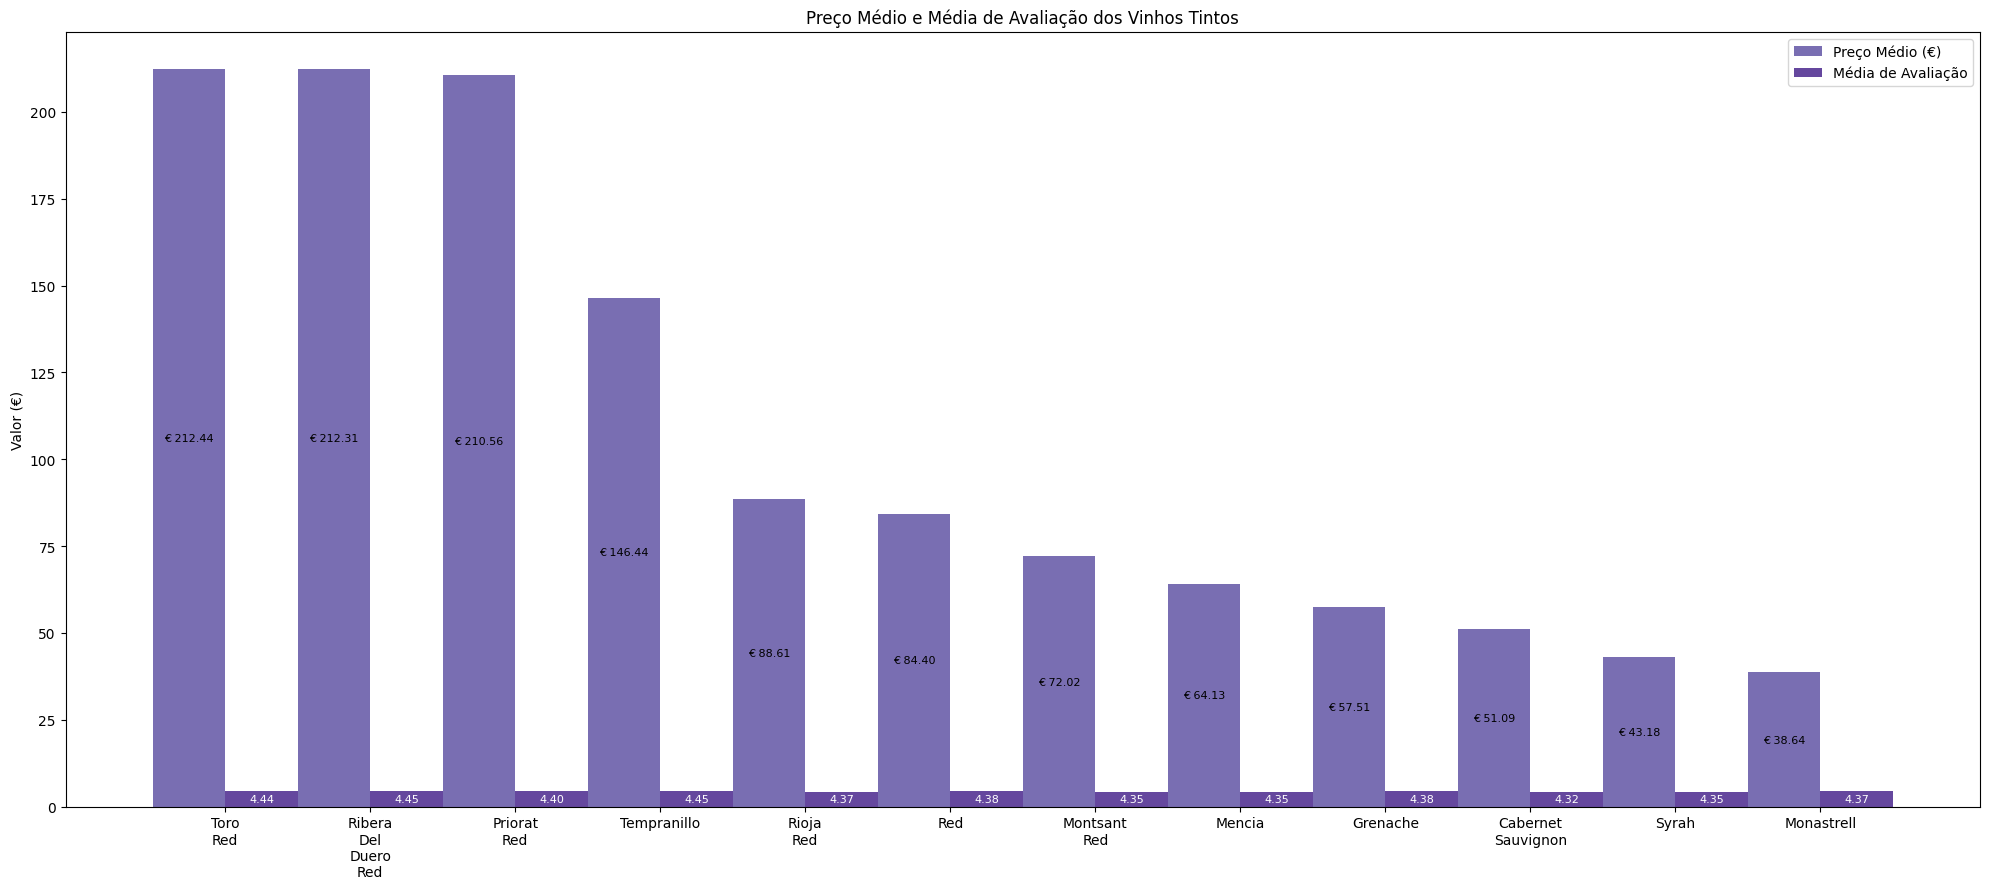

In [25]:
vinhos_tintos = df[df['Categoria'] == 'Vinhos Tintos']

media_avaliacao_tintos = vinhos_tintos.groupby('tipo')['avaliação'].mean()
media_preco_tintos = vinhos_tintos.groupby('tipo')['preço'].mean()

ordenado_por_preco = media_preco_tintos.sort_values(ascending=False)

media_avaliacao_tintos = media_avaliacao_tintos[ordenado_por_preco.index]
media_preco_tintos = media_preco_tintos[ordenado_por_preco.index]

bar_width = 0.5

# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(20, 9))  

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_tintos))

bars1 = ax1.bar(index - bar_width/2, media_preco_tintos, bar_width, label='Preço Médio (€)', color=palet_colors[5])

# Plotando a média de avaliação 
bars2 = ax1.bar(index + bar_width/2, media_avaliacao_tintos, bar_width, label='Média de Avaliação', color=palet_colors[6], bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_tintos):
    ax1.text(i - bar_width/2, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=8)  # Fonte menor para o preço

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_tintos):
    ax1.text(i + bar_width/2, v / 2, f'{v:.2f}', ha='center', va='center', fontsize=8, color='white')

ax1.set_title('Preço Médio e Média de Avaliação dos Vinhos Tintos')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos vinhos na horizontal, e quebrando as linhas
ax1.set_xticks(index)
ax1.set_xticklabels([name.replace(' ', '\n') for name in media_avaliacao_tintos.index], rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Na análise dos vinhos tintos o Toro Red, Ribera Del Duero Red e Priorat Red são os mais caros. O vinho tinto mais bem avaliado é o Tempranillo, possui um valor de vinho mediano comparado aos vinhos mais baratos e mais caros. Não existe um padrão entre avaliação e preço porém a menor avaliaçãoa qui está associada ao vinho de menor preço. O Monastrell dentre os vinhos tintos parece ser o que melhor apresenta custo benefício devido a seu preço relativamente baixo e avaliação relativamente alta.
* A diferença entre o vinho mais caro e mais barato é de: 173.80 euros
* A diferença entre o melhor avaliado (Tempranillo) e o pior avaliado (Cabernet Sauvignon) é de: 0.13

**A média de preço e avaliações do vinho branco**

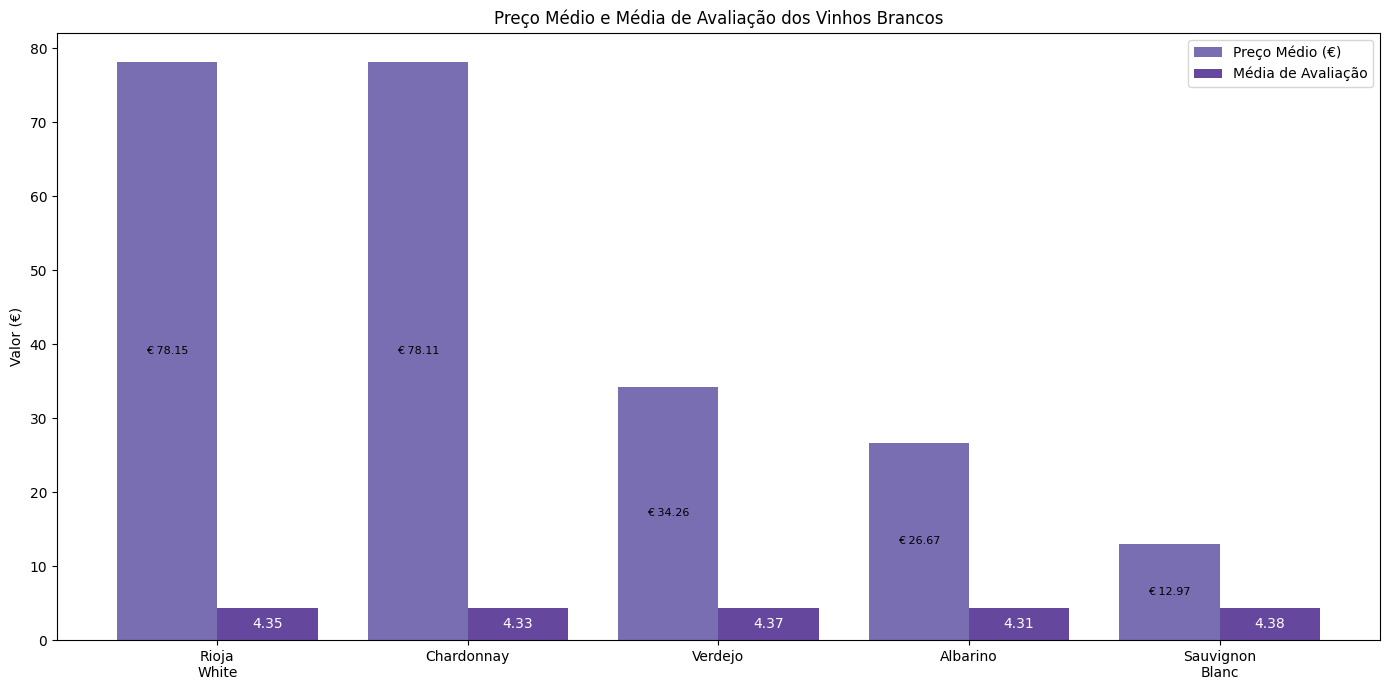

In [26]:
vinhos_brancos = df[df['Categoria'] == 'Vinhos Brancos']

media_avaliacao_brancos = vinhos_brancos.groupby('tipo')['avaliação'].mean()
media_preco_brancos = vinhos_brancos.groupby('tipo')['preço'].mean()

ordenado_por_preco = media_preco_brancos.sort_values(ascending=False)

media_avaliacao_brancos = media_avaliacao_brancos[ordenado_por_preco.index]
media_preco_brancos = media_preco_brancos[ordenado_por_preco.index]

bar_width = 0.4  

# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_brancos))
bars1 = ax1.bar(index - bar_width/2, media_preco_brancos, bar_width, label='Preço Médio (€)', color=palet_colors[5])

# Plotando a média de avaliação
bars2 = ax1.bar(index + bar_width/2, media_avaliacao_brancos, bar_width, label='Média de Avaliação', color=palet_colors[6])
# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_brancos):
    ax1.text(i - bar_width/2, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=8) 

# Adicionando os valores dentro da barra de avaliação
for i, v in enumerate(media_avaliacao_brancos):
    ax1.text(i + bar_width/2, v / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')


ax1.set_title('Preço Médio e Média de Avaliação dos Vinhos Brancos')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos vinhos na horizontal, e quebrando as linhas
ax1.set_xticks(index)
ax1.set_xticklabels([name.replace(' ', '\n') for name in media_avaliacao_brancos.index], rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Na análise dos vinhos brancos o Rioja White e Chardonnay é a variedade mais cara após ele outros vinhos estão abaixo de 50 euros. Aqui as avaliações novamente não acompanham a risca os preços pois o vinho branco Sauvignon Blanc possui o menor preço dentre os vinhos brancos e em contraponto a maior avaliação superando o vinho mais branco mais caro, sendo ele um ótimo candidato em relação a custo e benefício. 
* A diferença entre o vinho mais caro e mais barato é de: 65.18 euros
* A diferença entre o melhor avaliado (Sauvignon Blanc) e o pior avaliado (Albarino) é de: 0.07

**A média de preço e avaliações do vinho espumante**

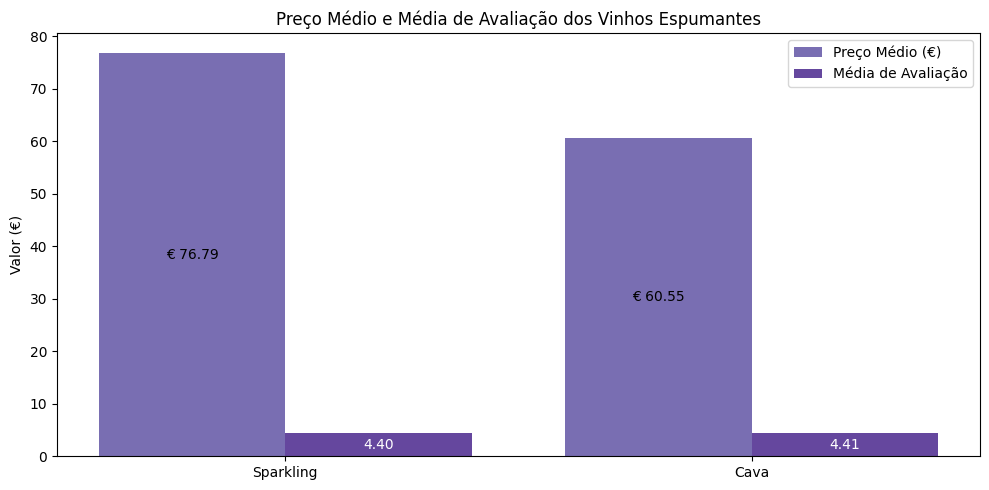

In [27]:
vinhos_espumantes = df[df['Categoria'] == 'Vinhos Espumantes']

media_avaliacao_espumantes = vinhos_espumantes.groupby('tipo')['avaliação'].mean()
media_preco_espumantes = vinhos_espumantes.groupby('tipo')['preço'].mean()

ordenado_por_preco = media_preco_espumantes.sort_values(ascending=False)

media_avaliacao_espumantes = media_avaliacao_espumantes[ordenado_por_preco.index]
media_preco_espumantes = media_preco_espumantes[ordenado_por_preco.index]

bar_width = 0.4  

# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 5)) 

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_espumantes))

bars1 = ax1.bar(index - bar_width/2, media_preco_espumantes, bar_width, label='Preço Médio (€)', color=palet_colors[5])

# Plotando a média de avaliação 
bars2 = ax1.bar(index + bar_width/2, media_avaliacao_espumantes, bar_width, label='Média de Avaliação', color=palet_colors[6], bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_espumantes):
    ax1.text(i - bar_width/2, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=10)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_espumantes):
    ax1.text(i + bar_width/2, v / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Preço Médio e Média de Avaliação dos Vinhos Espumantes')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos vinhos na horizontal, com quebra de linha se necessário
ax1.set_xticks(index)
ax1.set_xticklabels([name.replace(' ', '\n') for name in media_avaliacao_espumantes.index], rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Na análise dos vinhos espumantes temos duas marcas que possuem valores próximos e avaliações muito aproximadas  
* A diferença entre o vinho mais caro e mais barato é de: 16.24 euros
* A diferença entre as avalaiações é de: 0.01

**A média de preço e avaliações do vinho fortificado**

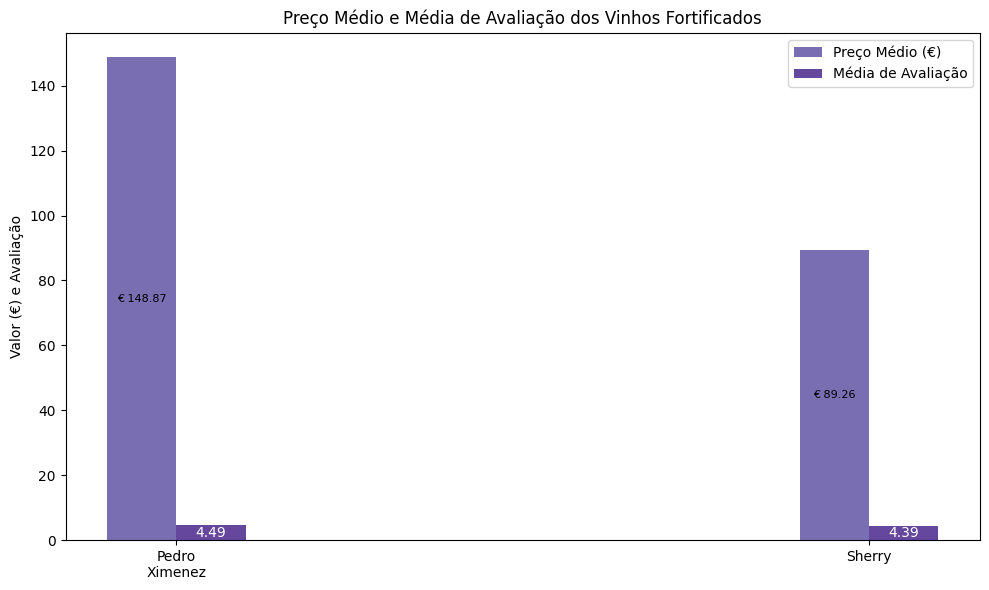

In [28]:
vinhos_fortificados = df[df['Categoria'] == 'Vinhos Fortificados']

media_avaliacao_fortificados = vinhos_fortificados.groupby('tipo')['avaliação'].mean()
media_preco_fortificados = vinhos_fortificados.groupby('tipo')['preço'].mean()

ordenado_por_preco_fortificados = media_preco_fortificados.sort_values(ascending=False)

media_avaliacao_fortificados = media_avaliacao_fortificados[ordenado_por_preco_fortificados.index]
media_preco_fortificados = media_preco_fortificados[ordenado_por_preco_fortificados.index]

bar_width = 0.10

fig, ax1 = plt.subplots(figsize=(10, 6)) 

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_fortificados))

bars1 = ax1.bar(index - bar_width/2, media_preco_fortificados, bar_width, label='Preço Médio (€)', color=palet_colors[5])

# Plotando a média de avaliação 
bars2 = ax1.bar(index + bar_width/2, media_avaliacao_fortificados, bar_width, label='Média de Avaliação', color=palet_colors[6], bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_fortificados):
    ax1.text(i - bar_width/2, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=8)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_fortificados):
    ax1.text(i + bar_width/2, v / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Preço Médio e Média de Avaliação dos Vinhos Fortificados')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€) e Avaliação')

# Colocando os rótulos dos vinhos na horizontal, com quebra de linha se necessário
ax1.set_xticks(index)
ax1.set_xticklabels([name.replace(' ', '\n') for name in media_avaliacao_fortificados.index], rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Na análise dos vinhos fortificados temos duas marcas que possuem valores muito distantes e avaliações muito diferentes também.  
* A diferença entre o vinho mais caro e mais barato é de: 59.61 euros
* A diferença entre as avalaiações é de: 0.10

**Análise de preço e avaliação dos vinhos mais caros**

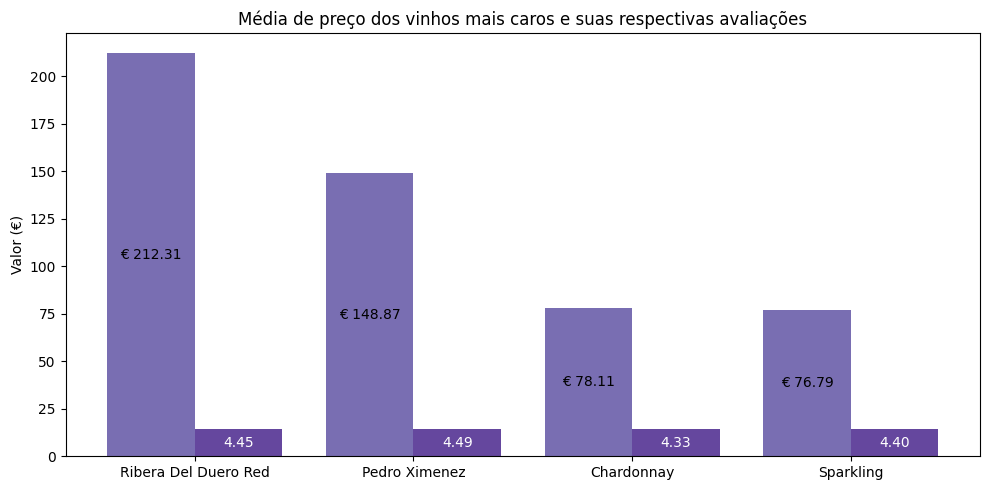

In [29]:
vinhos_selecionados = df[df['tipo'].isin(['Ribera Del Duero Red', 'Chardonnay', 'Sparkling', 'Pedro Ximenez'])]

media_avaliacao_selecionados = vinhos_selecionados.groupby('tipo')['avaliação'].mean()
media_preco_selecionados = vinhos_selecionados.groupby('tipo')['preço'].mean()

ordenado_por_preco = media_preco_selecionados.sort_values(ascending=False)

media_avaliacao_selecionados = media_avaliacao_selecionados[ordenado_por_preco.index]
media_preco_selecionados = media_preco_selecionados[ordenado_por_preco.index]

bar_width = 0.4 
padding = 10  

fig, ax1 = plt.subplots(figsize=(10, 5))  # Aumentando a largura da figura

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_selecionados))

bars1 = ax1.bar(index - bar_width/2, media_preco_selecionados, bar_width, label='Preço Médio (€)', color=palet_colors[5])

# Plotando a média de avaliação 
bars2 = ax1.bar(index + bar_width/2, media_avaliacao_selecionados + padding, bar_width, label='Média de Avaliação', color=palet_colors[6], bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_selecionados):
    ax1.text(i - bar_width/2, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=10)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_selecionados):
    ax1.text(i + bar_width/2, (v + padding) / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Média de preço dos vinhos mais caros e suas respectivas avaliações')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

ax1.set_xticks(index)
ax1.set_xticklabels(media_avaliacao_selecionados.index, rotation=0, ha='center')

# Adicionando as categorias de vinhos no gráfico
##for i, wine_type in enumerate(media_avaliacao_selecionados.index):
##    ax1.text(i, -5, f'{df[df["tipo"] == wine_type]["Categoria"].iloc[0]}', ha='center', va='center', fontsize=9, color='black')

## ax1.legend()

plt.tight_layout()
plt.show()



Os vinhos mais caros estão acima dos 70 euros. Possuem avaliações consideravelmente alta a partir da casa dos 4.45. Com o vinho (Pedro Ximenez- Vinho fortificado) sendo o maior  em avaliação e Ribera Del Duero Red o mais caro. 

**Análise de preço e avaliação dos vinhos mais baratos**

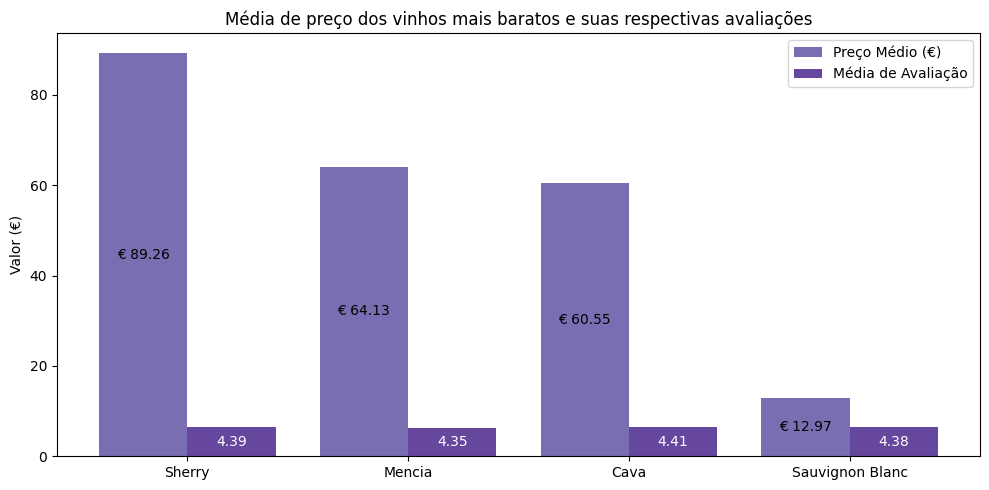

In [30]:
vinhos_selecionados = df[df['tipo'].isin(['Mencia', 'Sauvignon Blanc', 'Cava', 'Sherry'])]

media_avaliacao_selecionados = vinhos_selecionados.groupby('tipo')['avaliação'].mean()
media_preco_selecionados = vinhos_selecionados.groupby('tipo')['preço'].mean()

ordenado_por_preco = media_preco_selecionados.sort_values(ascending=False)

media_avaliacao_selecionados = media_avaliacao_selecionados[ordenado_por_preco.index]
media_preco_selecionados = media_preco_selecionados[ordenado_por_preco.index]

bar_width = 0.4  
padding = 2  

# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 5)) 

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_selecionados))

bars1 = ax1.bar(index - bar_width/2, media_preco_selecionados, bar_width, label='Preço Médio (€)', color=palet_colors[5])

# Plotando a média de avaliação 
bars2 = ax1.bar(index + bar_width/2, media_avaliacao_selecionados + padding, bar_width, label='Média de Avaliação', color=palet_colors[6], bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_selecionados):
    ax1.text(i - bar_width/2, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=10)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_selecionados):
    ax1.text(i + bar_width/2, (v + padding) / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Média de preço dos vinhos mais baratos e suas respectivas avaliações')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos tipos de vinhos
ax1.set_xticks(index)
ax1.set_xticklabels(media_avaliacao_selecionados.index, rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()



Dentre os vinhos mais baratos o (Sherry - Vinho fortificado) possui o maior preço. (Sauvignon Blac -vinho branco) possui o menor preço e uma avaliação apenas 0.01 do Sherry. Os outros dois vinhos (Sherry- Vinho fortificado) e  (Mencia- Vinho Tinto), possuem valores muito próximos tanto no preço quanto na avaliação.

**Maiores medias entre os vinhos analisados**

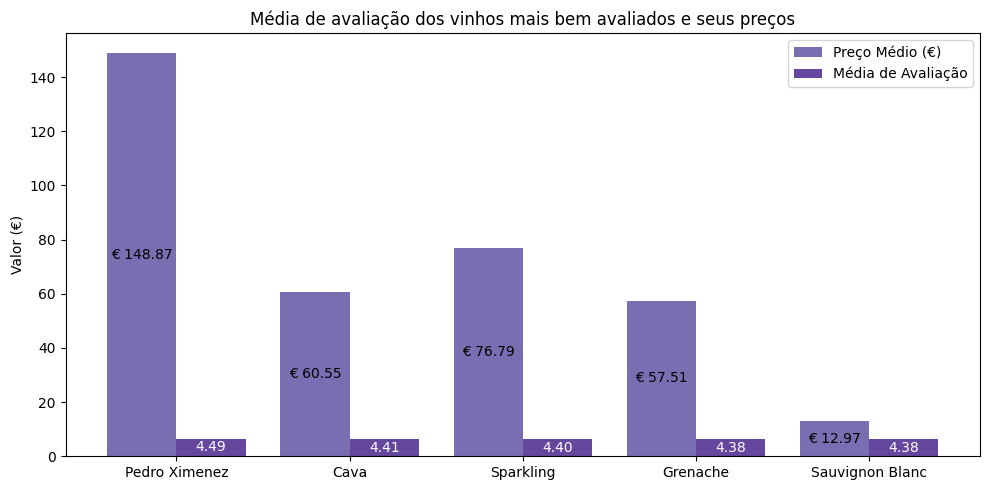

In [31]:
vinhos_selecionados = df[df['tipo'].isin(['Grenache', 'Sauvignon Blanc', 'Sparkling', 'Cava','Pedro Ximenez'])]

media_avaliacao_selecionados = vinhos_selecionados.groupby('tipo')['avaliação'].mean()
media_preco_selecionados = vinhos_selecionados.groupby('tipo')['preço'].mean()

ordenado_por_avaliacao = media_avaliacao_selecionados.sort_values(ascending=False)

media_avaliacao_selecionados = media_avaliacao_selecionados[ordenado_por_avaliacao.index]
media_preco_selecionados = media_preco_selecionados[ordenado_por_avaliacao.index]

bar_width = 0.4 
padding = 2  

# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 5)) 

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_selecionados))

bars1 = ax1.bar(index - bar_width/2, media_preco_selecionados, bar_width, label='Preço Médio (€)', color=palet_colors[5])

# Plotando a média de avaliação 
bars2 = ax1.bar(index + bar_width/2, media_avaliacao_selecionados + padding, bar_width, label='Média de Avaliação', color=palet_colors[6], bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_selecionados):
    ax1.text(i - bar_width/2, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=10)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_selecionados):
    ax1.text(i + bar_width/2, (v + padding) / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')


ax1.set_title('Média de avaliação dos vinhos mais bem avaliados e seus preços')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos tipos de vinhos
ax1.set_xticks(index)
ax1.set_xticklabels(media_avaliacao_selecionados.index, rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Dentre os vinhos com maiores avaliações há uma variedade de preços com dois grandes extremos (Pedro Ximenez- Vinho fortificado) e (Sauvignon Blanc- Vinho branco). Porém a maior avaliação média está voltada ao vinho de maior preço médio. O (Cava e Sparkling - únicos representantes de vinhos espumantes), estão no grupos dos mais bem avaliados devido a proximidade das avaliações. Ao todo não há avaliações menores de 4.38. 

**Menores medias entre os vinhos analisados**

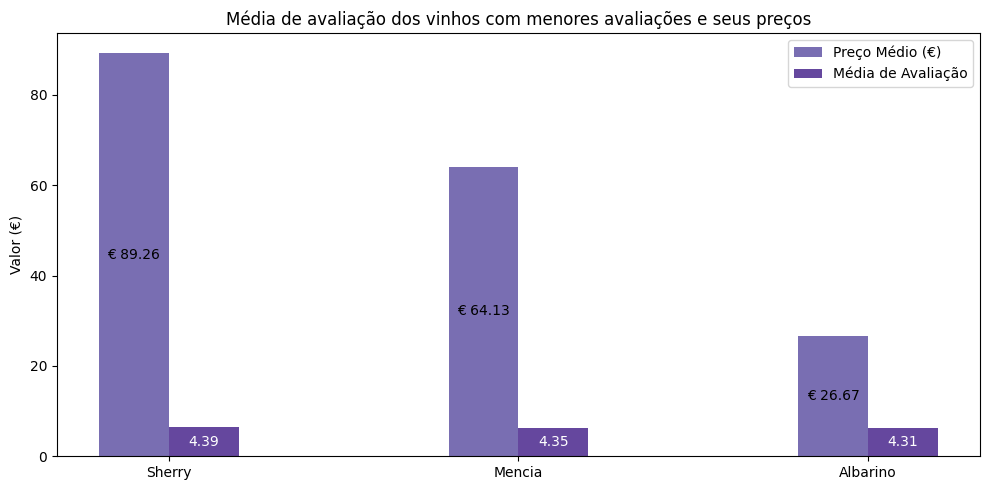

In [32]:
vinhos_selecionados = df[df['tipo'].isin(['Mencia', 'Albarino', 'Sherry'])]

media_avaliacao_selecionados = vinhos_selecionados.groupby('tipo')['avaliação'].mean()
media_preco_selecionados = vinhos_selecionados.groupby('tipo')['preço'].mean()

ordenado_por_avaliacao = media_avaliacao_selecionados.sort_values(ascending=False)

media_avaliacao_selecionados = media_avaliacao_selecionados[ordenado_por_avaliacao.index]
media_preco_selecionados = media_preco_selecionados[ordenado_por_avaliacao.index]


bar_width = 0.2  


# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 5)) 

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_selecionados))

bars1 = ax1.bar(index - bar_width/2, media_preco_selecionados, bar_width, label='Preço Médio (€)', color=palet_colors[5])

# Plotando a média de avaliação 
bars2 = ax1.bar(index + bar_width/2, media_avaliacao_selecionados + padding, bar_width, label='Média de Avaliação', color=palet_colors[6], bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_selecionados):
    ax1.text(i - bar_width/2, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=10)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_selecionados):
    ax1.text(i + bar_width/2, (v + padding) / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Média de avaliação dos vinhos com menores avaliações e seus preços')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos tipos de vinhos
ax1.set_xticks(index)
ax1.set_xticklabels(media_avaliacao_selecionados.index, rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Dentre os vinhos com menores avaliações médias estão (Albarino - vinho branco) e (Mencia - vinho tinto) com 4.35 seguido de (Sherry - vinho fortificante) com 4.39. Aqui nesse grupo é possível notar uma média de preço muito próxima que não supera os 38 euros e avaliações acima de 4.31. 

#### 3.Há alguma relação entre a avaliação e o preço médio dos vinhos?

In [33]:
correlation = df['preço'].corr(df['avaliação'])
print('Correlação entre preço e avaliação:', correlation)

Correlação entre preço e avaliação: 0.5072873568569948


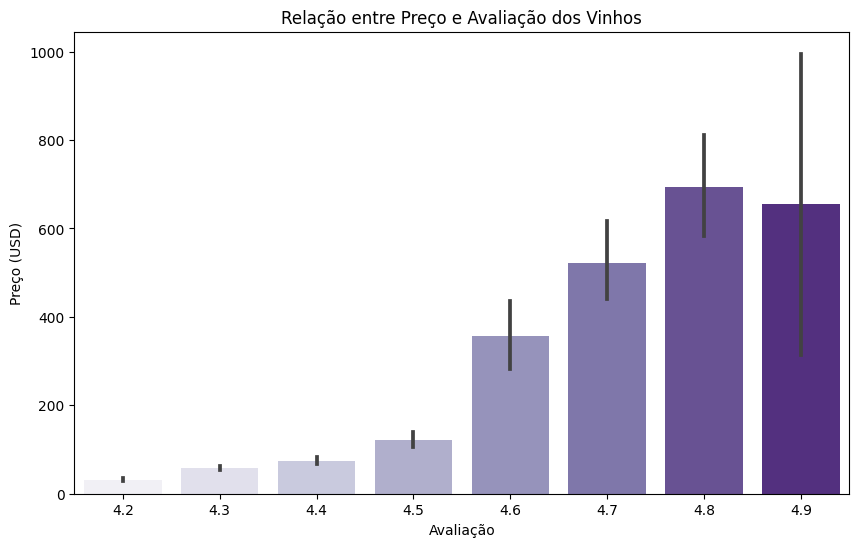

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="avaliação", y="preço", palette=palet_colors)
plt.title("Relação entre Preço e Avaliação dos Vinhos")
plt.xlabel("Avaliação")
plt.ylabel("Preço (USD)")
plt.show()

A análise das variáveis Avaliação e Preço indica uma correlação positiva moderada de 0,50 entre o valor do vinho e sua avaliação. Isso significa que, em média, vinhos com preços mais elevados tendem a receber notas mais altas, sugerindo uma percepção de maior qualidade associada a vinhos mais caros.

#### 4.Quais são os melhores anos de vinhos avaliados? São os mais antigos?  

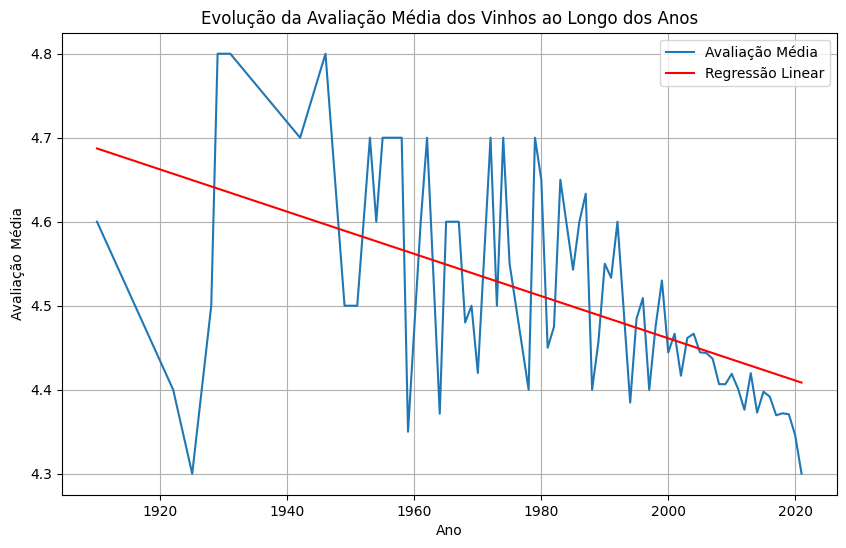

In [35]:
media_por_ano = df.groupby('ano')['avaliação'].mean()

slope, intercept, r_value, p_value, std_err = linregress(media_por_ano.index, media_por_ano.values)

plt.figure(figsize=(10, 6))
plt.plot(media_por_ano.index, media_por_ano.values, label='Avaliação Média')

plt.plot(media_por_ano.index, slope * media_por_ano.index + intercept, color='red', label='Regressão Linear')

plt.xlabel('Ano')
plt.ylabel('Avaliação Média')
plt.title('Evolução da Avaliação Média dos Vinhos ao Longo dos Anos')
plt.grid(True)
plt.legend()
plt.show()

A média de avaliação, apesar de apresentar grande variação ao longo do tempo, sofreu uma tendência de regressão nos anos mais recentes.

In [36]:
top_5_anos = media_por_ano.nlargest(5)

<Figure size 1000x600 with 0 Axes>

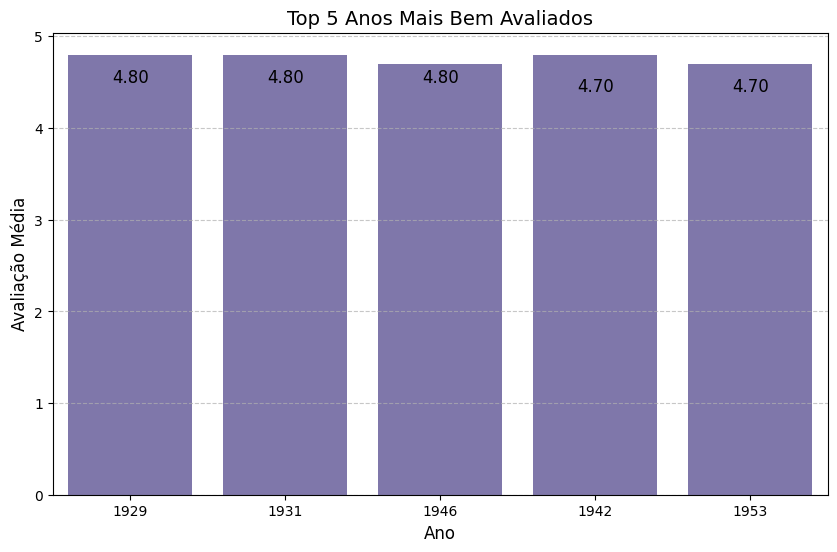

In [37]:
plt.figure(figsize=(10, 6))

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_anos.index, y=top_5_anos.values, color=palet_colors[5])

for i, value in enumerate(top_5_anos.values):
    plt.text(i, value - 0.15, f'{value:.2f}', ha='center', va='top', fontsize=12, color='black')

plt.title('Top 5 Anos Mais Bem Avaliados', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Avaliação Média', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=range(len(top_5_anos.index)), labels=[int(year) for year in top_5_anos.index])
plt.show()

Entre os anos de 1929 e 1946, destacam-se os vinhos com as melhores avaliações, apresentando uma média de 4,8. Esses vinhos são reconhecidos por sua alta qualidade e prestígio. Embora a diversidade de vinhos tenha aumentado ao longo do tempo, os vinhos mais antigos continuam a ser os mais bem avaliados, indicando uma possível correlação entre a longevidade e a excelência percebida, independentemente das variações no mercado atual.

#### 5. A acidez ou o corpo dos vinhos influenciam a avaliação média dos usuários?

Abaixo está sendo calculado a média de avaliação dos vinhos com base na acidez e no corpo:

In [38]:
grupo_acidez = df.groupby(['acidez'])['avaliação'].mean().reset_index()

In [39]:
grupo_corpo = df.groupby(['corpo'])['avaliação'].mean().reset_index()

In [40]:
grupo_acidez_corpo = df.groupby(['acidez', 'corpo'])['avaliação'].mean().reset_index()

In [41]:
grupo_acidez.head(10)

,acidez,avaliação
0,0,4.329520
1,1,4.494286
2,2,4.457143
3,3,4.408433


In [42]:
grupo_corpo.head(10)

,corpo,avaliação
0,0,4.329520
1,2,4.423529
2,3,4.348113
3,4,4.387438
4,5,4.461041


In [43]:
grupo_acidez_corpo.head(10)

,acidez,corpo,avaliação
0,0,0,4.329520
1,1,5,4.494286
2,2,4,4.457143
3,3,2,4.423529
4,3,3,4.348113
5,3,4,4.382208
6,3,5,4.459098


Nos resultados acima vemos que os valores de média estão bastante próximos entre os grupos, quase não tendo diferença significativa em relação a acidez e corpo.

E para entender melhor os valores numéricos de acidez e corpo do vinho, foi feito uma pesquisa online para saber o real significado, caso fosse um valor categórico nominal.

1. O corpo de um vinho é a sensação de "peso" que ele deixa na boca e pode ser categorizado em uma escala de 0 a 5.

* *0*: Corpo leve – vinho leve, mas com um pouco mais de estrutura; comum em vinhos brancos e tintos suaves.
* *2*: Corpo médio-leve – oferece alguma estrutura, com um pouco mais de presença na boca, mas ainda fácil de beber.
* *3*: Corpo médio – equilíbrio entre intensidade e suavidade; vinhos com taninos moderados, álcool e presença na boca.
* *4*: Corpo médio-encorpado – vinho com boa presença, mais peso e intensidade; vinhos mais complexos, com taninos e álcool mais evidentes.
* *5*: Corpo encorpado – vinho robusto e intenso, com alto teor de taninos e álcool; sensação rica e densa na boca, geralmente com sabores mais concentrados.

2. A acidez de um vinho reflete o frescor e a vivacidade do sabor. Em vinhos, uma acidez mais alta (representada por valores maiores) contribui para um sabor mais "crocante" e refrescante.

 * *0*: Acidez baixa – vinho ainda suave, mas com uma leve presença de frescor; pode ser percebido como "redondo" ou "suave".
 * *1*: Acidez média-baixa – apresenta algum frescor, mas sem ser dominante; comum em vinhos mais maduros.
 * *2*: Acidez média – um bom equilíbrio entre suavidade e frescor; vinhos equilibrados, com sabor vibrante sem ser muito ácido.
 * *3*: Acidez alta – vinho muito fresco e vibrante, com acidez acentuada; sensação de "crocância", comum em vinhos brancos e tintos leves.

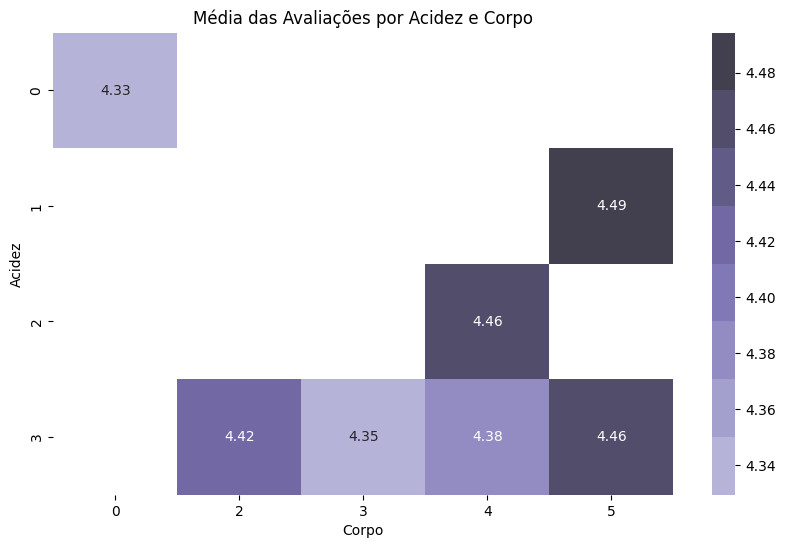

In [44]:
heatmap_data = grupo_acidez_corpo.pivot(index='acidez', columns='corpo', values='avaliação')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap=palet_colors2, fmt=".2f")
plt.title('Média das Avaliações por Acidez e Corpo')
plt.xlabel('Corpo')
plt.ylabel('Acidez')
plt.show()

Acima temos uma Análise da média das avaliações com base na acidez e no corpo dos vinhos, com o eixo x representando o corpo com valores de 0 a 5 e o eixo y a acidez com valores de 0 a 3 e as cores variando tons de roxo a média da avaliação e temos uma observação gráfica de onde a avaliação é maior ou menor.

#### 6. Correlação entre as variáveis. Quais as maiores e menores?

C:\Users\layss\AppData\Local\Temp\ipykernel_9496\2618437747.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap=palet_colors)


<Axes: >

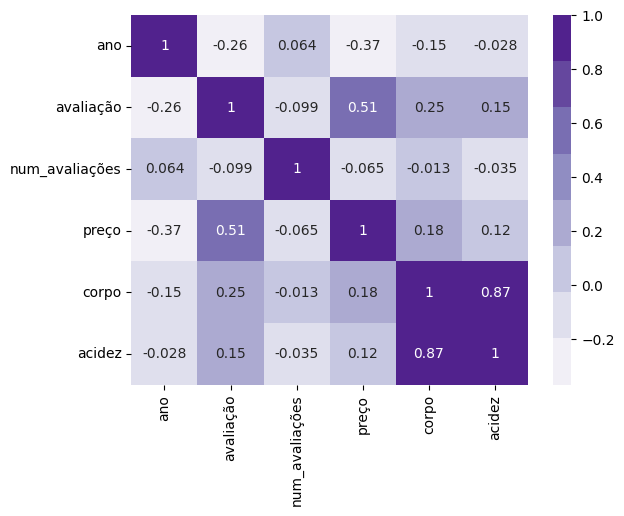

In [48]:
sns.heatmap(df.corr(),annot=True,cmap=palet_colors)

Com base na análise podemos avaliar que o a maioria das variáveis ​​numéricas não tem muita correlação na coluna de preços, exceto a avaliação que tem uma correlação positiva moderada, o que significa que quando a avaliação é elevada, é mais provável que o preço também seja elevado, o que faz sentido (mas não em todos os casos). E o corpo e acidez tem bastante influencia entre si.

#### 7. Qual região teve o maior número de avaliações em relação ao ano? E a maior média de avalição?

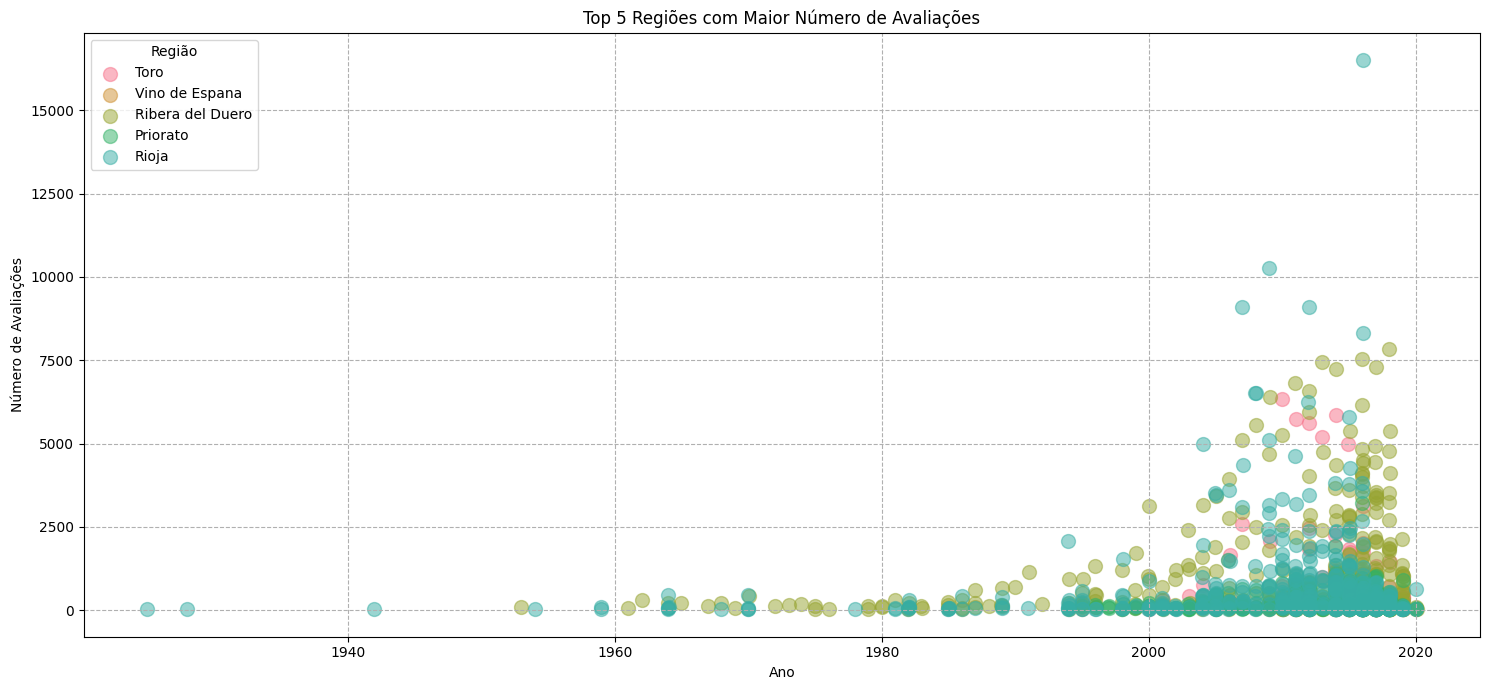

In [46]:
soma_avaliacoes_por_regiao = df.groupby('região')['num_avaliações'].sum()

top_05 = soma_avaliacoes_por_regiao.nlargest(5).index

df_top05 = df[df['região'].isin(top_05)]


fig, ax = plt.subplots(figsize=(15, 7))

def jitter(df, column='ano', jitter_strength=0.05):
    """Adicionar um deslocamento pequeno (jitter) aos valores de uma coluna para evitar sobreposição"""
    return df[column] + np.random.uniform(-jitter_strength, jitter_strength, size=len(df))

for i, regiao in enumerate(df_top05['região'].unique()):
    regiao_data = df_top05[df_top05['região'] == regiao]
    jittered_x = jitter(regiao_data) 
    ax.scatter(jittered_x, regiao_data['num_avaliações'], 
               label=regiao, color=qualitative_colors[i], s=100, alpha=0.5)

ax.set_title("Top 5 Regiões com Maior Número de Avaliações")
ax.set_xlabel("Ano")
ax.set_ylabel("Número de Avaliações")
ax.legend(title="Região", bbox_to_anchor=(0, 1), loc='upper left')

ax.grid(axis='x', linestyle='--', alpha=1.0)
ax.grid(axis='y', linestyle='--', alpha=1.0)

plt.tight_layout()
plt.show()

Alta Popularidade: Rioja destaca-se como a região mais popular, liderando o número de avaliações e ampla presença de mercado ao longo dos anos, somando ao todo 460.461 avaliações recebidas no total geral.

Crescimento de Avaliações Recentes: Observa-se um aumento significativo nas avaliações a partir dos anos 2000, com Rioja e Ribera del Duero recebendo as maiores quantidades de avaliações.

Diversificação de Interesse: Regiões como Toro e Priorato também mostram um aumento nas avaliações mais recentemente, indicando uma expansão do interesse por diferentes regiões vinícolas.

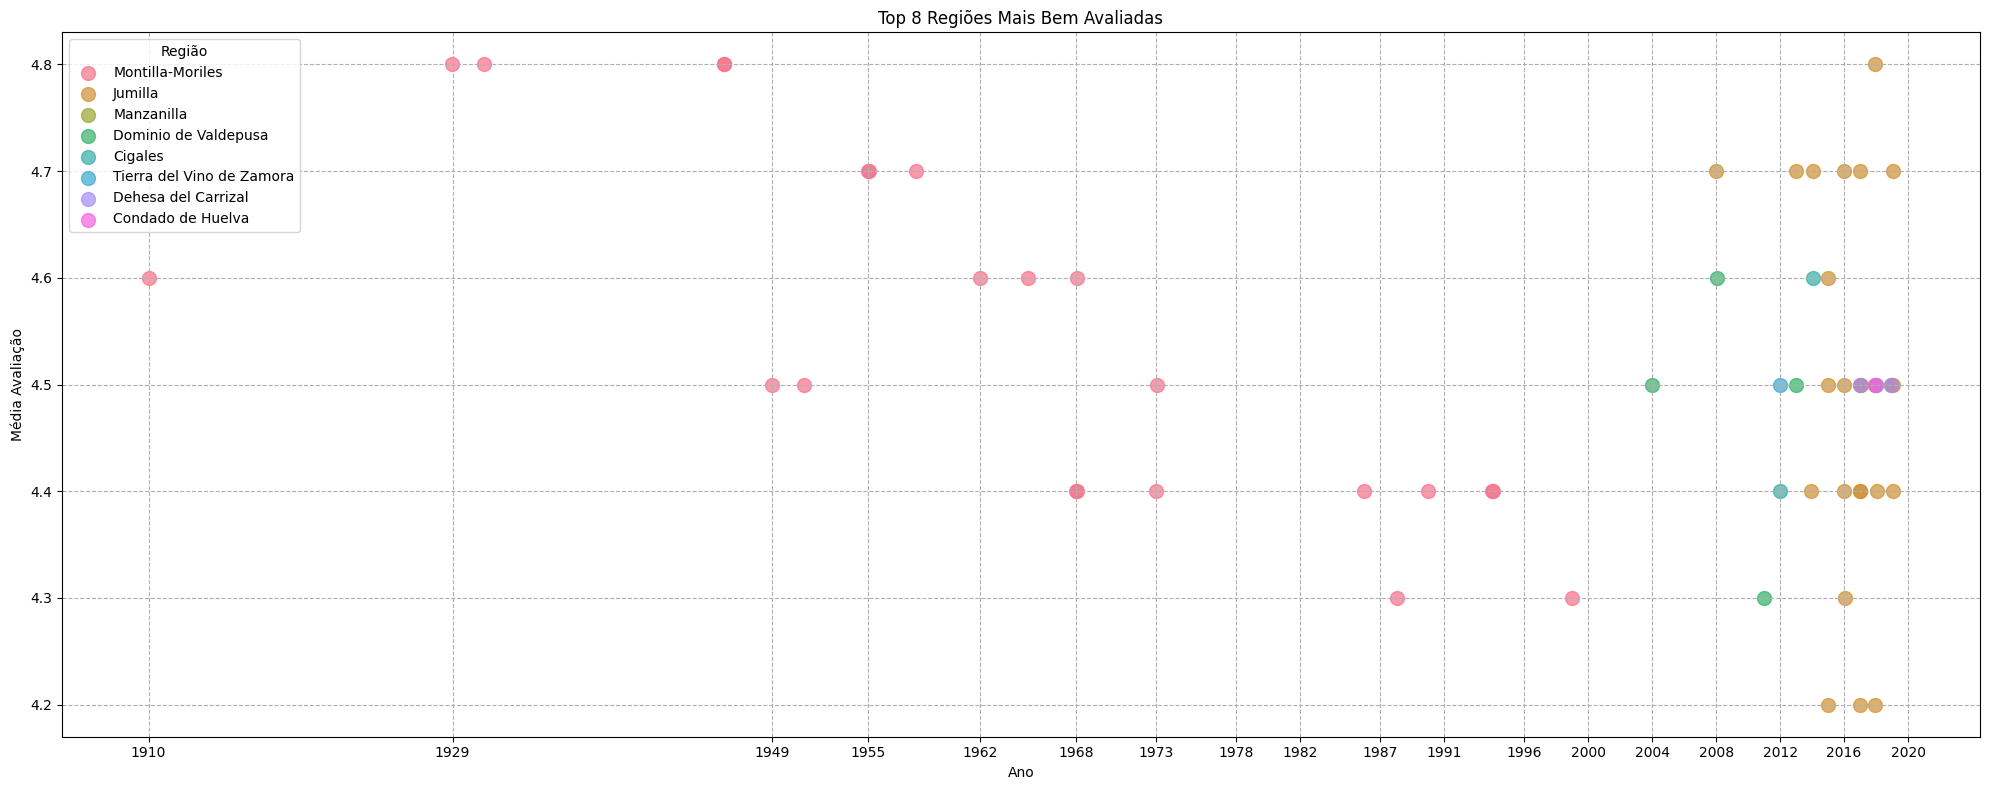

In [47]:
avaliacao_por_regiao = df.groupby('região')['avaliação'].mean()

top_08 = avaliacao_por_regiao.nlargest(8).index

df_top08 = df[df['região'].isin(top_08)]

fig, ax = plt.subplots(figsize=(20, 8))

def jitter(df, column='ano', jitter_strength=0.05):
    """Adicionar um deslocamento pequeno (jitter) aos valores de uma coluna para evitar sobreposição"""
    return df[column] + np.random.uniform(-jitter_strength, jitter_strength, size=len(df))

for i, regiao in enumerate(df_top08['região'].unique()):
    regiao_data = df_top08[df_top08['região'] == regiao]
    jittered_x = jitter(regiao_data) 
    ax.scatter(jittered_x, regiao_data['avaliação'], 
               label=regiao, color=qualitative_colors[i], s=100, alpha=0.7)

ax.set_title("Top 8 Regiões Mais Bem Avaliadas")
ax.set_xlabel("Ano")
ax.set_ylabel("Média Avaliação")
ax.legend(title="Região", bbox_to_anchor=(0, 1), loc='upper left')

ax.grid(axis='x', linestyle='--', alpha=1.0)
ax.grid(axis='y', linestyle='--', alpha=1.0)

anos = sorted(df['ano'].dropna().unique())
intervalo = 4
anos_espacados = anos[::intervalo]
ax.set_xticks(anos_espacados)

plt.tight_layout()
plt.show()

Melhor Avaliação: Montilla-Moriles mantém médias de avaliação altas ao longo dos anos, indicando consistência de qualidade. Além de possuir a maior média de avaliação (4.54), destacando-se como a região de maior qualidade percebida.

Crescimento Recente: Jumilla e Manzanilla apresentam avaliações altas especialmente após 2000, sugerindo um recente reconhecimento de qualidade.

Picos de Qualidade: Cigales e Condado de Huelva têm picos de avaliação elevados em anos específicos, mas menos constância.

Tendência Geral Pós-2000: A maior parte das avaliações concentra-se no período pós-2000, evidenciando um crescimento da visibilidade dessas regiões no mercado de vinhos.

Popularidade vs. Qualidade: Rioja é a mais popular, mas Montilla-Moriles é a mais bem avaliada, sugerindo que volume de avaliações e qualidade média não estão diretamente relacionados.

Regiões de Qualidade Consistente:
Além de Montilla-Moriles, Cigales, Condado de Huelva, Dehesa del Carrizal, e Tierra del Vino de Zamora mantêm uma alta média de avaliação (4.5), indicando consistência na qualidade, mesmo com um menor número de avaliações.

## 4. Insights



**Top 3 Vinhos mais baratos e mais caros e suas respectivas vinícolas:**

* **Vinhos mais caros:**
    1. Pedro Ximenez (fortificado) – Região Noroeste da Espanha, vinícolas como Bodegas Alvear.
    2. Chardonnay – Vinícolas de regiões montanhosas, como aquelas de Rías Baixas ou Penedès.
    3. Vinhos Tintos Encorpados – Variedades como Tempranillo de alta qualidade, com destaque para vinícolas de Ribera del Duero e Priorato.
* **Vinhos mais baratos:**
    1. Cava (espumante) – Produzido principalmente em Penedès, com vinícolas como Freixenet e Codorníu.
    2. Sauvignon Blanc – Encontrado em regiões de menor altitude, com destaque para vinícolas no Centro-Norte da Espanha.
    3. Mencía – Variedade típica de Bierzo e Galícia, geralmente com preços mais acessíveis.

**O tipo de vinho afeta a avaliação média ou o preço?**

* **Preço:**
    * A variação de preço entre os tipos de vinho é significativa. Vinhos fortificados e tintos de maior corpo tendem a ser mais caros, enquanto espumantes como o Cava e vinhos brancos como Sauvignon Blanc são mais acessíveis. Regiões de origem e variedades de uvas influenciam bastante o preço.
* **Avaliação média:**
    * Não existe uma relação direta entre preço e avaliação. Embora vinhos caros como os fortificados e espumantes tendam a ter avaliações mais altas, há exceções. A percepção de qualidade também é influenciada por outros fatores, como características sensoriais (acidez, corpo).
* **Custo-benefício:**
    * Alguns vinhos oferecem um excelente custo-benefício, como o Sauvignon Blanc (branco) e o Monastrell (tinto).
    * A avaliação não é sempre diretamente proporcional ao preço.

**Relação entre Preço e Avaliação:**

* **Correlação moderada(0.51):**
    * A correlação entre preço e avaliação sugere que vinhos mais caros tendem a ter melhores avaliações, mas o preço não é o único fator determinante na percepção de qualidade.

* **Tendência da Avaliação ao Longo do Tempo:**
    * Vinhos mais antigos, produzidos entre 1929 e 1942, possuem as melhores médias de avaliação (4.8), refletindo o prestígio e a longevidade desses vinhos no mercado.

**A acidez e o corpo dos vinhos na influência da avaliação dos usuários**

   * Não foi observada uma grande diferença nas avaliações com base nas características de corpo e acidez dos vinhos. No entanto, a combinação de um vinho encorpado (corpo 5) com acidez média baixa (acidez 1) tende a gerar avaliações mais altas, sugerindo uma preferência por vinhos equilibrados.

**Avaliação Por Região ao longo dos anos**   
   * Região mais Popular: Rioja, com mais de 400 mil avaliações, continua a ser a região mais popular, seguida por Ribera del Duero, que também tem ganhado destaque desde os anos 2000.
    **Qualidade vs. Popularidade:**
    * Enquanto Rioja é a região mais popular, Montilla-Moriles se destaca por sua qualidade, com uma média de 4.54, demonstrando que a popularidade e qualidade nem sempre estão relacionadas.
    **Crescimento de Novas Regiões:**
    * Regiões menos tradicionais, como Toro e Priorato, estão ganhando popularidade e reconhecimento por sua qualidade. Jumilla e Manzanilla também têm se destacado nas avaliações após os anos 2000.

   * **Popularidade vs. Qualidade:**
    * Rioja é a mais popular, mas Montilla-Moriles lidera em qualidade, mostrando que popularidade e alta avaliação nem sempre coincidem.
    * Além de Montilla-Moriles, Cigales, Condado de Huelva, Dehesa del Carrizal e Tierra del Vino de Zamora mantêm médias altas (4.5), indicando uma consistência de qualidade, mesmo com menos avaliações.

* **Correlação Entre as Variáveis**
    **Corpo e Acidez:**
    * Existe uma forte correlação positiva (0.87) entre corpo e acidez, indicando que vinhos mais encorpados tendem a apresentar níveis mais elevados de acidez. Essa relação pode ser atribuída ao perfil sensorial desses vinhos, que frequentemente equilibram estrutura e frescor.

    **Preço e Avaliação:**
    * Observa-se uma correlação moderada positiva (0.51) entre o preço e a avaliação. Isso sugere que vinhos com melhores avaliações tendem, em média, a ser mais caros, refletindo possivelmente a associação entre qualidade percebida e valor no mercado.

    **Ano e Preço:**
    * A correlação negativa (-0.37) entre ano e preço indica que vinhos mais antigos podem ser ligeiramente mais baratos. Essa tendência pode refletir um mercado em que vinhos mais jovens, especialmente os de safras recentes, estão sendo valorizados.

**Outros Insights:**

* **Dispersão de avaliações:** Há uma grande variação no número de avaliações por vinho.
* **Características sensoriais:** A maioria dos vinhos apresenta corpo entre 3 e 5 e acidez entre 0 e 3.
* **Vinhos tintos:** Ribera Del Duero Red e Priorat Red são as variedades mais comuns.
* **Vinhos brancos:** Chardonnay é a variedade mais cara.
* **Vinhos espumantes:** Cava é a variedade mais comum.